# Anomaly detection

- K-Means
- LOF Local Outlier Factor
- One Class SVM
- Covariance Elliptic
- IF no seasonality, Use moving average, moving std, to find condidence inteval and beyond that is outlier
- If include seasonalty, On error distribution=(actual -predict forcast), use moving average and moving std to find outlier errors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Train_vidhya
df_vidh = pd.read_csv("Train_vidhya.csv")

In [2]:
df_vidh.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
print(df_vidh.shape[0], df_vidh['ID'].nunique())

18288 18288


In [4]:
df_vidh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [5]:
df_vidh['Datetime'] = pd.to_datetime(df_vidh['Datetime'])

In [6]:
df_vidh['Datetime_trunc'] = df_vidh['Datetime'].dt.floor('D')

In [7]:
df_vidh.head()

,ID,Datetime,Count,Datetime_trunc
0,0,2012-08-25 00:00:00,8,2012-08-25
1,1,2012-08-25 01:00:00,2,2012-08-25
2,2,2012-08-25 02:00:00,6,2012-08-25
3,3,2012-08-25 03:00:00,2,2012-08-25
4,4,2012-08-25 04:00:00,2,2012-08-25


In [90]:
df_vidh[(df_vidh['Datetime'] >= '2014-09-25') & (df_vidh['Datetime'] < '2014-09-26')]

,ID,Datetime,Count,Datetime_trunc
18264,18264,2014-09-25 00:00:00,686,2014-09-25
18265,18265,2014-09-25 01:00:00,546,2014-09-25
18266,18266,2014-09-25 02:00:00,550,2014-09-25
18267,18267,2014-09-25 03:00:00,416,2014-09-25
18268,18268,2014-09-25 04:00:00,344,2014-09-25
18269,18269,2014-09-25 05:00:00,334,2014-09-25
18270,18270,2014-09-25 06:00:00,416,2014-09-25
18271,18271,2014-09-25 07:00:00,498,2014-09-25
18272,18272,2014-09-25 08:00:00,482,2014-09-25
18273,18273,2014-09-25 09:00:00,512,2014-09-25


In [102]:
df_vidh[(df_vidh['Datetime'] >= '2014-09-25') & (df_vidh['Datetime'] < '2014-09-26')].mean()

ID       18275.500000
Count      589.666667
dtype: float64

In [100]:
df_test = pd.read_csv('Train_vidhya.csv')
df_test.Timestamp = pd.to_datetime(df_test.Datetime,format='%d-%m-%Y %H:%M') 
df_test.index = df_test.Timestamp 
df_new = df_test.resample('D').mean()

C:\Users\niava\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


In [104]:
df_new.iloc[-1]

ID       18275.500000
Count      589.666667
Name: 2014-09-25 00:00:00, dtype: float64

In [105]:
df_new.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


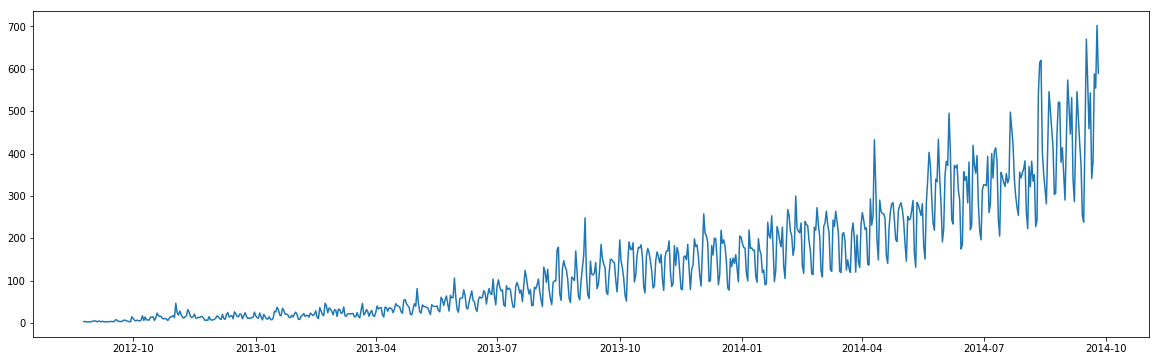

In [108]:
plt.figure(figsize=(20,6))
plt.plot(df_new.index,df_new['Count'])

In [8]:
df_vidh_grp = df_vidh[df_vidh['Datetime_trunc'] <= '2014-10-01'].groupby(by=['Datetime_trunc']).sum()['Count'].reset_index()

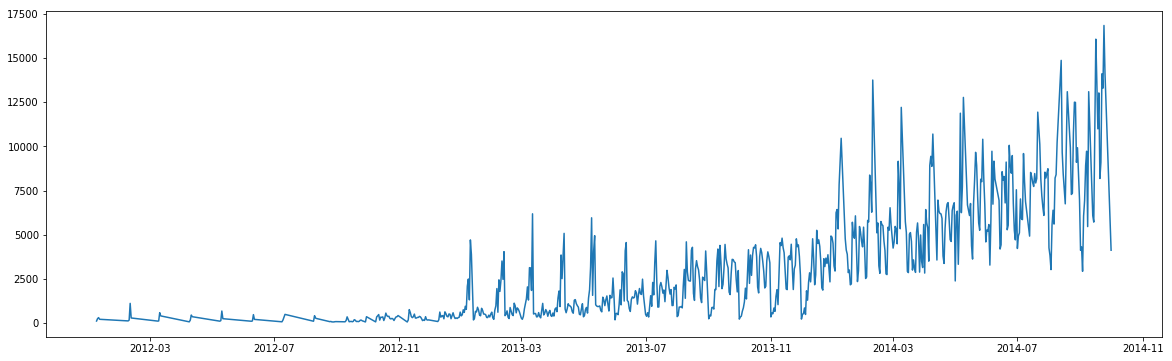

In [29]:
plt.figure(figsize=(20,6))
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['Count'])

In [9]:
df_vidh_grp['rolling_mean'] = df_vidh_grp['Count'].rolling(30).mean()
df_vidh_grp['rolling_std'] = df_vidh_grp['Count'].rolling(30).std().abs()
df_vidh_grp['rolling_plus_3std'] = df_vidh_grp['rolling_mean'] + (df_vidh_grp['rolling_std']*3.0) 
df_vidh_grp['rolling_minus_3std'] = df_vidh_grp['rolling_mean'] - (df_vidh_grp['rolling_std']*3.0) 

# had to go longer for rolling mean to kill the seasonality

In [117]:
s = pd.Series([1, 2,3, 4, 5, 6, 7,8,9,10])
s.rolling(3).mean()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [125]:
s

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [118]:
s.rolling(3).std()

0    NaN
1    NaN
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

In [124]:
(s.rolling(3).mean() - s).abs().rolling(3).std()  # not correct

0    NaN
1    NaN
2    NaN
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

In [127]:
df_vidh_grp.tail(10)

,Datetime_trunc,Count,rolling_mean,rolling_std,rolling_plus_3std,rolling_minus_3std,anomaly_3sigma,anomaly_2sigma,date_time_int
726,2014-09-17,13676,8966.533333,3198.444619,18561.867191,-628.800524,0,1,1410912000000000000
727,2014-09-18,11000,9079.066667,3208.953368,18705.926771,-547.793438,0,0,1410998400000000000
728,2014-09-19,13034,9288.533333,3256.424565,19057.807028,-480.740361,0,1,1411084800000000000
729,2014-09-20,8186,9231.000000,3260.274444,19011.823331,-549.823331,0,0,1411171200000000000
730,2014-09-21,9102,9097.600000,3177.154112,18629.062335,-433.862335,0,0,1411257600000000000
731,2014-09-22,14116,9167.400000,3265.393260,18963.579781,-628.779781,0,1,1411344000000000000
732,2014-09-23,13304,9245.800000,3337.164121,19257.292364,-765.692364,0,1,1411430400000000000
733,2014-09-24,16856,9476.200000,3614.140823,20318.622469,-1366.222469,1,1,1411516800000000000
734,2014-09-25,14152,9705.200000,3687.227558,20766.882673,-1356.482673,0,1,1411603200000000000
735,2014-10-01,4122,9597.266667,3803.793188,21008.646230,-1814.112897,0,1,1412121600000000000


In [128]:
def confidence_interval(roll_mean, roll_std, actual, level):
    upper_limit = roll_mean + roll_std * level
    lower_limit = roll_mean - roll_std * level
    try:
        
        if(actual > upper_limit or  actual < lower_limit):
            return 1
        else:
            return 0
    except:
        return 0

df_vidh_grp['anomaly_3sigma'] = df_vidh_grp.apply(lambda x:confidence_interval(x.rolling_mean, x.rolling_std, x.Count, 3), axis=1)
df_vidh_grp['anomaly_2sigma'] = df_vidh_grp.apply(lambda x:confidence_interval(x.rolling_mean, x.rolling_std, x.Count, 2), axis=1)


In [129]:
df_vidh_grp.tail(10)

,Datetime_trunc,Count,rolling_mean,rolling_std,rolling_plus_3std,rolling_minus_3std,anomaly_3sigma,anomaly_2sigma,date_time_int
726,2014-09-17,13676,8966.533333,3198.444619,18561.867191,-628.800524,0,0,1410912000000000000
727,2014-09-18,11000,9079.066667,3208.953368,18705.926771,-547.793438,0,0,1410998400000000000
728,2014-09-19,13034,9288.533333,3256.424565,19057.807028,-480.740361,0,0,1411084800000000000
729,2014-09-20,8186,9231.000000,3260.274444,19011.823331,-549.823331,0,0,1411171200000000000
730,2014-09-21,9102,9097.600000,3177.154112,18629.062335,-433.862335,0,0,1411257600000000000
731,2014-09-22,14116,9167.400000,3265.393260,18963.579781,-628.779781,0,0,1411344000000000000
732,2014-09-23,13304,9245.800000,3337.164121,19257.292364,-765.692364,0,0,1411430400000000000
733,2014-09-24,16856,9476.200000,3614.140823,20318.622469,-1366.222469,0,1,1411516800000000000
734,2014-09-25,14152,9705.200000,3687.227558,20766.882673,-1356.482673,0,0,1411603200000000000
735,2014-10-01,4122,9597.266667,3803.793188,21008.646230,-1814.112897,0,0,1412121600000000000


In [130]:
df_vidh_grp['date_time_int'] = df_vidh_grp.Datetime_trunc.astype(np.int64)

a_3sigma = df_vidh_grp[df_vidh_grp['anomaly_3sigma'] == 1]
a_2sigma = df_vidh_grp[df_vidh_grp['anomaly_2sigma'] == 1]

a_3sigma.head()

,Datetime_trunc,Count,rolling_mean,rolling_std,rolling_plus_3std,rolling_minus_3std,anomaly_3sigma,anomaly_2sigma,date_time_int
135,2013-01-07,2084,494.800000,355.761873,1562.085619,-572.485619,1,1,1357516800000000000
136,2013-01-08,2492,575.066667,501.624872,2079.941284,-929.807951,1,1,1357603200000000000
138,2013-01-10,4706,749.000000,906.578829,3468.736486,-1970.736486,1,1,1357776000000000000
169,2013-02-10,3512,892.533333,815.432347,3338.830375,-1553.763708,1,1,1360454400000000000
171,2013-02-12,4042,1034.200000,1002.514955,4041.744864,-1973.344864,1,1,1360627200000000000


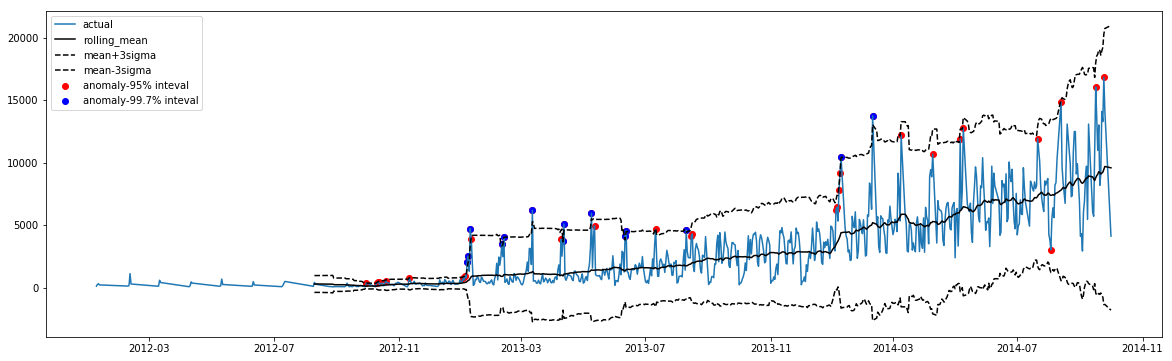

In [131]:
plt.figure(figsize=(20,6))
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['Count'], label='actual')
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['rolling_mean'], label='rolling_mean', color='black')
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['rolling_plus_3std'], linestyle='--', color='black',label='mean+3sigma')
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['rolling_minus_3std'], linestyle='--', color='black',label='mean-3sigma')
plt.scatter(a_2sigma['Datetime_trunc'].values, a_2sigma['Count'].values, c='red', label='anomaly-95% inteval')
plt.scatter(a_3sigma['Datetime_trunc'].values, a_3sigma['Count'].values, c='blue', label='anomaly-99.7% inteval')
plt.legend()
# had to use value scatter with date time had issue

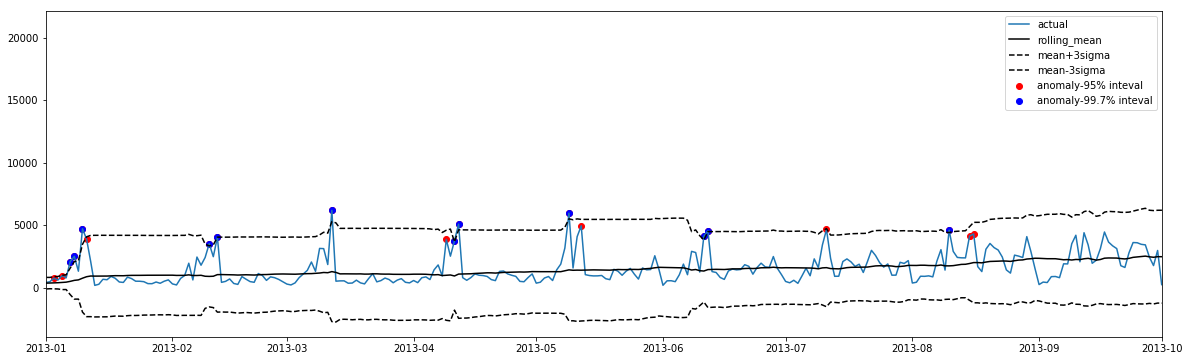

In [220]:
plt.figure(figsize=(20,6))
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['Count'], label='actual')
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['rolling_mean'], label='rolling_mean', color='black')
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['rolling_plus_3std'], linestyle='--', color='black',label='mean+3sigma')
plt.plot(df_vidh_grp['Datetime_trunc'], df_vidh_grp['rolling_minus_3std'], linestyle='--', color='black',label='mean-3sigma')
plt.scatter(a_2sigma['Datetime_trunc'].values, a_2sigma['Count'].values, c='red', label='anomaly-95% inteval')
plt.scatter(a_3sigma['Datetime_trunc'].values, a_3sigma['Count'].values, c='blue', label='anomaly-99.7% inteval')
plt.xlim(['2013-01-01', '2013-10-01'])
plt.legend()

In [135]:
df_vidh_grp.shape[0]

736

In [134]:
train.tail(10)

,Datetime_trunc,Count,rolling_mean,rolling_std,rolling_plus_3std,rolling_minus_3std,anomaly_3sigma,anomaly_2sigma,date_time_int
192,2013-03-05,1088,1099.400000,980.770584,4041.711751,-1842.911751,0,0,1362441600000000000
193,2013-03-06,1376,1113.000000,981.714018,4058.142055,-1832.142055,0,0,1362528000000000000
194,2013-03-07,2046,1116.200000,984.688342,4070.265026,-1837.865026,0,0,1362614400000000000
195,2013-03-08,1300,1139.200000,980.506498,4080.719495,-1802.319495,0,0,1362700800000000000
196,2013-03-09,3136,1162.266667,1019.620312,4221.127604,-1896.594271,0,0,1362787200000000000
197,2013-03-10,3118,1206.533333,1075.129494,4431.921817,-2018.855150,0,0,1362873600000000000
198,2013-03-11,1844,1187.733333,1058.193612,4362.314168,-1986.847501,0,0,1362960000000000000
199,2013-03-12,6186,1276.866667,1336.691096,5286.939953,-2733.206620,1,1,1363046400000000000
200,2013-03-13,510,1211.400000,1324.073250,5183.619751,-2760.819751,0,0,1363132800000000000
201,2013-03-14,534,1094.466667,1215.961397,4742.350858,-2553.417525,0,0,1363219200000000000


In [10]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

df = df_vidh_grp[['Datetime_trunc', 'Count']].copy().set_index('Datetime_trunc')

<Figure size 1440x720 with 0 Axes>

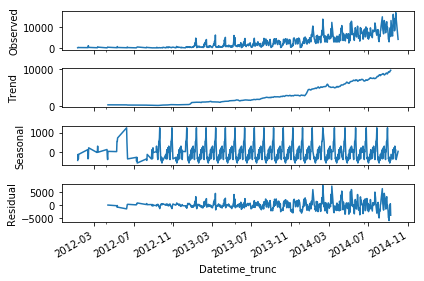

In [11]:
plt.figure(figsize=(20,10))
decomposition = sm.tsa.seasonal_decompose(df["Count"], model='additive', freq=30)
fig = decomposition.plot()
plt.show()

<Figure size 1440x720 with 0 Axes>

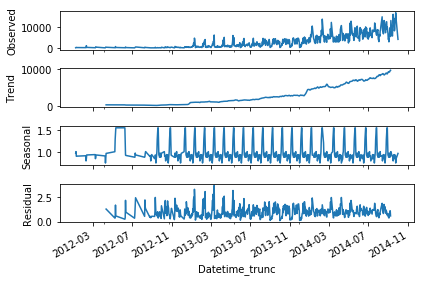

In [12]:
plt.figure(figsize=(20,10))
decomposition = sm.tsa.seasonal_decompose(df["Count"], model='multiplicative', freq=30)
fig = decomposition.plot()
plt.show()

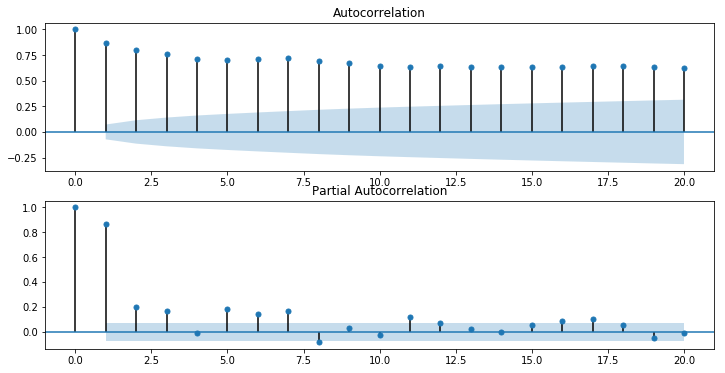

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df["Count"].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df["Count"].dropna(), ax=ax[1], lags=20)

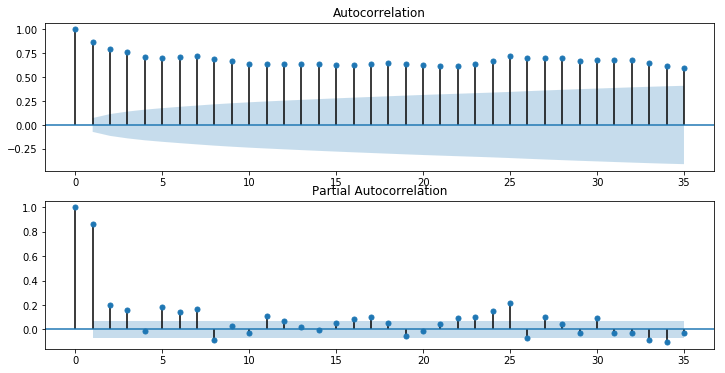

In [36]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df["Count"].dropna(), ax=ax[0], lags=35)
ax[1] = plot_pacf(df["Count"].dropna(), ax=ax[1], lags=35)

### Summary of rules for identifying ARIMA models

Identifying the order of differencing and the constant:

- Rule 1: If the series has positive autocorrelations out to a high number of lags (say, 10 or more), then it probably needs a higher order of differencing.

- Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING.

- Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest. (Not always, though. Slightly too much or slightly too little differencing can also be corrected with AR or MA terms. See rules 6 and 7.)

- Rule 4: A model with no orders of differencing assumes that the original series is stationary (among other things, mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model).
- Rule 5: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend.

In [14]:
df['station_1'] = df.Count.diff(periods=1) #differencing 1 period

In [15]:
df['station_30'] = df.Count.diff(periods=30) #differencing 30 period

In [16]:
df['station_7'] = df.Count.diff(periods=7) #differencing 7 period

In [17]:
df.head()

,Count,station_1,station_30,station_7
Datetime_trunc,,,,
2012-01-09,112,NaN,NaN,NaN
2012-01-10,248,136.0,NaN,NaN
2012-01-11,304,56.0,NaN,NaN
2012-01-12,210,-94.0,NaN,NaN
2012-02-09,118,-92.0,NaN,NaN


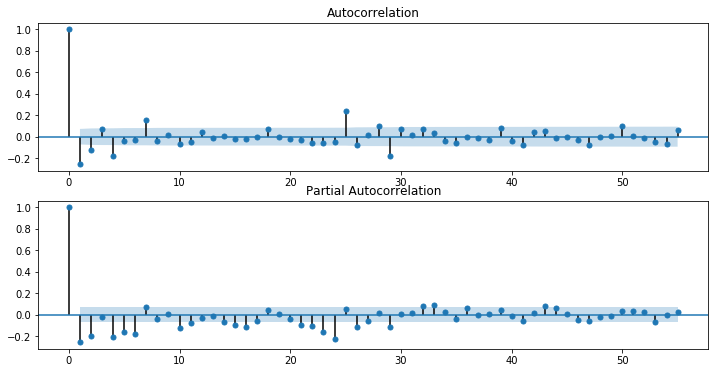

In [38]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df['station_1'].dropna(), ax=ax[0], lags=55)
ax[1] = plot_pacf(df['station_1'].dropna(), ax=ax[1], lags=55)

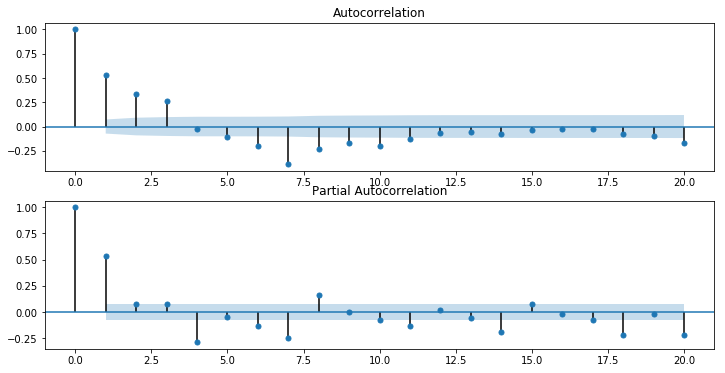

In [19]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df['station_7'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df['station_7'].dropna(), ax=ax[1], lags=20)

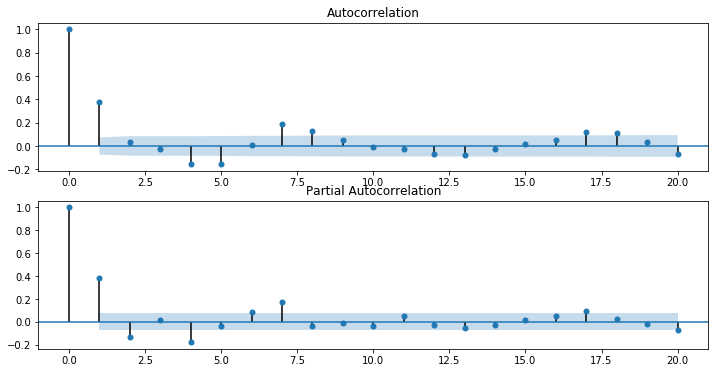

In [20]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df['station_30'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df['station_30'].dropna(), ax=ax[1], lags=20)

In [21]:
df.head()

,Count,station_1,station_30,station_7
Datetime_trunc,,,,
2012-01-09,112,NaN,NaN,NaN
2012-01-10,248,136.0,NaN,NaN
2012-01-11,304,56.0,NaN,NaN
2012-01-12,210,-94.0,NaN,NaN
2012-02-09,118,-92.0,NaN,NaN


<Figure size 1440x720 with 0 Axes>

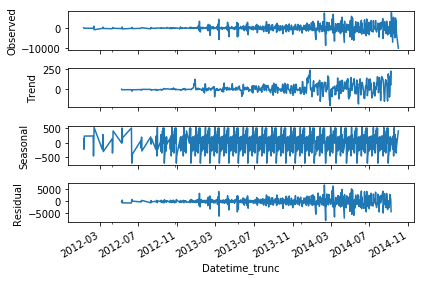

In [205]:
plt.figure(figsize=(20,10))
decomposition = sm.tsa.seasonal_decompose(df['station_1'].dropna(), model='additive',freq=30)
fig = decomposition.plot()
plt.show()

<Figure size 1440x720 with 0 Axes>

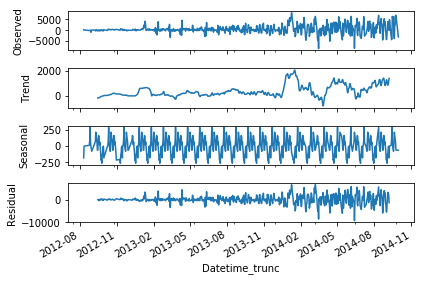

In [206]:
plt.figure(figsize=(20,10))
decomposition = sm.tsa.seasonal_decompose(df['station_30'].dropna(), model='additive', freq=30)
fig = decomposition.plot()
plt.show()

In [208]:
from statsmodels.tsa.stattools import kpss

print(" > Is the data stationary ?")
dftest = kpss(df.Count, 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.708
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**The test statistic is above the critical values, we reject the null hypothesis, our series is not trend stationary.**

In [211]:
print(" > Is the data stationary ?")
dftest = kpss(df['station_1'].dropna(), 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.026
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [212]:
print(" > Is the data stationary ?")
dftest = kpss(df['station_30'].dropna(), 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.045
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [213]:
print(" > Is the data stationary ?")
dftest = kpss(df['station_7'].dropna(), 'ct')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[3].items():
    print("\t{}: {}".format(k, v))

 > Is the data stationary ?
Test statistic = 0.021
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Identifying the numbers of AR and MA terms:

- Rule 6: If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms.
- Rule 7: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.
- Rule 8: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL.
- Rule 9: If there is a unit root in the AR part of the model--i.e., if the sum of the AR coefficients is almost exactly 1--you should reduce the number of AR terms by one and increase the order of differencing by one.
- Rule 10: If there is a unit root in the MA part of the model--i.e., if the sum of the MA coefficients is almost exactly 1--you should reduce the number of MA terms by one and reduce the order of differencing by one.
- Rule 11: If the long-term forecasts* appear erratic or unstable, there may be a unit root in the AR or MA coefficients.

In [217]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 0, 1) x (0, 0, 2, 30)
SARIMAX: (0, 0, 2) x (0, 1, 0, 30)
SARIMAX: (0, 0, 2) x (0, 1, 1, 30)


In [219]:
df.tail()

,Count,station,station_1,station_30,station_7
Datetime_trunc,,,,,
2014-09-22,14116,5014.0,5014.0,2094.0,3428.0
2014-09-23,13304,-812.0,-812.0,2352.0,-2776.0
2014-09-24,16856,3552.0,3552.0,6912.0,3180.0
2014-09-25,14152,-2704.0,-2704.0,6870.0,3152.0
2014-10-01,4122,-10030.0,-10030.0,-3238.0,-8912.0


In [23]:
train = df.loc['2013-01-01':'2013-08-31']['Count']

In [24]:
train = df.loc['2013-01-01':'2013-08-31']['Count']
test = df.loc['2013-09-01':'2013-11-30']['Count']

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,\
                                            order=param,\
                                            seasonal_order=param_seasonal,\
                                            enforce_stationarity=False,\
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:               
            continue


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 30)12 - AIC:4333.010357960224
ARIMA(0, 0, 0)x(0, 0, 1, 30)12 - AIC:3698.2414690242495


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 2, 30)12 - AIC:3117.870443843085
ARIMA(0, 0, 0)x(0, 1, 0, 30)12 - AIC:3543.4647577141986


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 30)12 - AIC:3024.12593486763


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 2, 30)12 - AIC:5798.592161967655


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 2, 0, 30)12 - AIC:3226.834113371883


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 2, 1, 30)12 - AIC:2572.8954850443183


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 2, 2, 30)12 - AIC:5228.244688477245


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 30)12 - AIC:3558.6231028817247


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 30)12 - AIC:3519.5377306879036


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 2, 30)12 - AIC:3027.3681282484076


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 30)12 - AIC:3034.5000299344138


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 30)12 - AIC:3020.277158753256


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 2, 30)12 - AIC:6373.909066803268


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 2, 0, 30)12 - AIC:2606.951914682298


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 2, 1, 30)12 - AIC:2553.4639712545477


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 2, 2, 30)12 - AIC:4298.315279234919


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 0, 0, 30)12 - AIC:3035.6284658174736


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 0, 1, 30)12 - AIC:3037.1962098054682


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 0, 2, 30)12 - AIC:3022.1398585260285


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 1, 0, 30)12 - AIC:2546.9067132089212


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 1, 1, 30)12 - AIC:2548.095944375669


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 1, 2, 30)12 - AIC:6224.891070633314


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 2, 0, 30)12 - AIC:2075.3636763306854


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(2, 2, 1, 30)12 - AIC:2058.444074657353


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(2, 2, 2, 30)12 - AIC:4973.516788922155
ARIMA(0, 0, 1)x(0, 0, 0, 30)12 - AIC:4165.798433536191


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 30)12 - AIC:3604.656492970992


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 2, 30)12 - AIC:3060.757641378246


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 30)12 - AIC:3528.381813650969
ARIMA(0, 0, 1)x(0, 1, 1, 30)12 - AIC:3004.6553193531395


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 2, 30)12 - AIC:6214.847533005848


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 2, 0, 30)12 - AIC:3212.050982411628


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 2, 1, 30)12 - AIC:2558.9102859678605


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 2, 2, 30)12 - AIC:4143.2096853286075


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 30)12 - AIC:3556.266803193807


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 30)12 - AIC:3500.6097148929143


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 2, 30)12 - AIC:3008.5254902533998


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 30)12 - AIC:3032.438997835969


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 30)12 - AIC:3003.24412926802


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 2, 30)12 - AIC:6096.44389663555


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 2, 0, 30)12 - AIC:2608.592523594889


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 2, 1, 30)12 - AIC:2540.003178482687


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 2, 2, 30)12 - AIC:5159.289914607457


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 0, 30)12 - AIC:3034.4043883979516


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 1, 30)12 - AIC:3036.398750472276


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 0, 2, 30)12 - AIC:3006.8051135465757


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 1, 0, 30)12 - AIC:2542.421851516015


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 1, 1, 30)12 - AIC:2544.4087950013936


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 1, 2, 30)12 - AIC:5818.6399765848255


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 2, 0, 30)12 - AIC:2074.7274380363797


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(2, 2, 1, 30)12 - AIC:2055.299650840225


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(2, 2, 2, 30)12 - AIC:4426.57972879772


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 0, 0, 30)12 - AIC:4123.575502257078


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 0, 1, 30)12 - AIC:3581.88661871763


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 0, 2, 30)12 - AIC:3042.004803301981


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 1, 0, 30)12 - AIC:3512.434622764823


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 1, 1, 30)12 - AIC:2990.892272614795


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(0, 1, 2, 30)12 - AIC:5699.066589345668


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 2, 0, 30)12 - AIC:3187.7672502399114


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(0, 2, 1, 30)12 - AIC:2544.1127317908567


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(0, 2, 2, 30)12 - AIC:5543.223144152206


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 0, 0, 30)12 - AIC:3557.855029704272


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 0, 1, 30)12 - AIC:3486.961503928485


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 0, 2, 30)12 - AIC:2994.6579575411574


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 1, 0, 30)12 - AIC:3034.233707011008


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 1, 1, 30)12 - AIC:2989.3405186628124


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(1, 1, 2, 30)12 - AIC:5923.074811532263


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 2, 0, 30)12 - AIC:2610.229563048376


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 2, 1, 30)12 - AIC:2525.6778250227226


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(1, 2, 2, 30)12 - AIC:5299.8235346970305


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 0, 0, 30)12 - AIC:3036.222020490164


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 0, 1, 30)12 - AIC:3038.176096159158


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 0, 2, 30)12 - AIC:2992.4121142716685


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 1, 0, 30)12 - AIC:2544.409355528224


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 1, 1, 30)12 - AIC:2546.396183370627


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 1, 2, 30)12 - AIC:6067.091498206076


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 2, 0, 30)12 - AIC:2070.7404933120115


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 2)x(2, 2, 1, 30)12 - AIC:2053.566725503223


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 2, 2, 30)12 - AIC:5513.755978986939
ARIMA(0, 1, 0)x(0, 0, 0, 30)12 - AIC:4069.1635718475386


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 30)12 - AIC:3566.9977061474165


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 2, 30)12 - AIC:3072.6635276249112


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 30)12 - AIC:3657.1258388689675


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 30)12 - AIC:3085.6301097676246


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 2, 30)12 - AIC:6191.75570207955


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 2, 0, 30)12 - AIC:3336.526438947097


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 2, 1, 30)12 - AIC:2654.8823745513982


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 2, 2, 30)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 0, 0, 30)12 - AIC:3580.0870199789874


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 30)12 - AIC:3565.239926060407


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 2, 30)12 - AIC:3076.791227802263


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 30)12 - AIC:3112.4647484234492


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 30)12 - AIC:3086.421273085546


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 2, 30)12 - AIC:5372.718142774191


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 2, 0, 30)12 - AIC:2702.4481051013627


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 2, 1, 30)12 - AIC:2626.006920428732


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 0, 0, 30)12 - AIC:3077.310131219767


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 0, 1, 30)12 - AIC:3079.9927167134356


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 0, 2, 30)12 - AIC:3074.3529308997327


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 1, 0, 30)12 - AIC:2595.0866076696993


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 1, 1, 30)12 - AIC:2592.0864451858315


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 1, 2, 30)12 - AIC:4356.886173183789


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 2, 0, 30)12 - AIC:2127.1789060222413


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 2, 1, 30)12 - AIC:2095.52425823271


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 30)12 - AIC:4013.747665479421


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 30)12 - AIC:3500.503636259804


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 2, 30)12 - AIC:3011.09231576619


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 30)12 - AIC:3509.20239207299


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 30)12 - AIC:2974.6496754333994


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 2, 30)12 - AIC:6302.391008924789


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 2, 0, 30)12 - AIC:3209.3887595771653


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 2, 1, 30)12 - AIC:2537.430707285398


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 2, 2, 30)12 - AIC:9616.240002348104


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 30)12 - AIC:3497.336998011012


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 30)12 - AIC:3449.9331188023834


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 2, 30)12 - AIC:2967.620819794045


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 30)12 - AIC:3006.9006112488732


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 30)12 - AIC:2976.32316565179


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 2, 30)12 - AIC:5753.8177066842745


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 2, 0, 30)12 - AIC:2594.98142064316


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 2, 1, 30)12 - AIC:2515.6660239822786


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 2, 2, 30)12 - AIC:10080.579284280868


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 0, 0, 30)12 - AIC:2992.246614836524


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 0, 1, 30)12 - AIC:2991.7232329853537


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 0, 2, 30)12 - AIC:2960.955251052709


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 0, 30)12 - AIC:2518.520531882945


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 1, 30)12 - AIC:2519.943197354573


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 1, 2, 30)12 - AIC:6114.829566847089


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 2, 0, 30)12 - AIC:2062.384141790446


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 2, 1, 30)12 - AIC:2038.9997960291744


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 2, 2, 30)12 - AIC:2005.7920293098346


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 0, 0, 30)12 - AIC:3990.528247060623


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 0, 1, 30)12 - AIC:3475.634708900823


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 0, 2, 30)12 - AIC:2988.9262223249416


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 1, 0, 30)12 - AIC:3499.0432601068105


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 1, 1, 30)12 - AIC:2959.750035794469


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 1, 2, 30)12 - AIC:5248.160812008743


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 2, 0, 30)12 - AIC:3183.202117111994


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 2, 1, 30)12 - AIC:2523.0502187096617


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 2, 2, 30)12 - AIC:9601.771296880783


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 0, 0, 30)12 - AIC:3494.7641293133593


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 0, 1, 30)12 - AIC:3434.315885255433


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 0, 2, 30)12 - AIC:2951.140225398676


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 0, 30)12 - AIC:3008.397153916054


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 1, 30)12 - AIC:2961.5099602148694


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 1, 2, 30)12 - AIC:5132.84333616468


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 2, 0, 30)12 - AIC:2596.345880105101


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 2, 1, 30)12 - AIC:2501.6630292213576


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 0, 0, 30)12 - AIC:2992.627213268861


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 0, 1, 30)12 - AIC:2993.0624325755643


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 0, 2, 30)12 - AIC:2946.8738094894097


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 0, 30)12 - AIC:2518.4052218309


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 1, 30)12 - AIC:2519.5663931464796


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 30)12 - AIC:5267.832817797445


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 2, 0, 30)12 - AIC:2062.0288564091065


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 2, 1, 30)12 - AIC:2036.8682297668227


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 2, 2, 30)12 - AIC:1990.3171293644834
ARIMA(0, 2, 0)x(0, 0, 0, 30)12 - AIC:4286.282430961108


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(0, 0, 1, 30)12 - AIC:3761.7301922383012


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(0, 0, 2, 30)12 - AIC:3225.840193013848
ARIMA(0, 2, 0)x(0, 1, 0, 30)12 - AIC:3861.8790737520417


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(0, 1, 1, 30)12 - AIC:3249.8041461448674


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(0, 1, 2, 30)12 - AIC:6074.969092056478


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(0, 2, 0, 30)12 - AIC:3506.1116406932388


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(0, 2, 1, 30)12 - AIC:2787.831175958542


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(0, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 0, 0, 30)12 - AIC:3776.9102553831535


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 0, 1, 30)12 - AIC:3762.6916321145827


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 0, 2, 30)12 - AIC:3229.139169969445


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 1, 0, 30)12 - AIC:3292.2583764757746


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 1, 1, 30)12 - AIC:3249.8001871983915


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 1, 2, 30)12 - AIC:4910.6956406717745


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 2, 0, 30)12 - AIC:2851.1500253743616


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 2, 1, 30)12 - AIC:2758.7915944458987


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(1, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 0, 0, 30)12 - AIC:3245.7676620689217


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 0, 1, 30)12 - AIC:3247.7613615286873


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 0, 2, 30)12 - AIC:3226.393381185949


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 1, 0, 30)12 - AIC:2737.54405902904


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 1, 1, 30)12 - AIC:2724.060664389598


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 1, 2, 30)12 - AIC:5724.098921741723


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 2, 0, 30)12 - AIC:2231.6464915421975


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 2, 1, 30)12 - AIC:2191.4899074141026


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 0)x(2, 2, 2, 30)12 - AIC:nan
ARIMA(0, 2, 1)x(0, 0, 0, 30)12 - AIC:4056.0324570410376


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(0, 0, 1, 30)12 - AIC:3541.1695331438614


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 0, 2, 30)12 - AIC:3043.4544603632557


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(0, 1, 0, 30)12 - AIC:3637.0366840888246


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(0, 1, 1, 30)12 - AIC:3081.69088385755


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 1, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(0, 2, 0, 30)12 - AIC:3315.241830122636


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(0, 2, 1, 30)12 - AIC:2703.091926806341


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(0, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 0, 0, 30)12 - AIC:3581.9830577119465


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 0, 1, 30)12 - AIC:3550.406423292604


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 0, 2, 30)12 - AIC:3045.7800067819135


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 1, 0, 30)12 - AIC:3122.266049495849


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 1, 1, 30)12 - AIC:3051.7587160807734


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 1, 2, 30)12 - AIC:11570.044135219083


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 2, 0, 30)12 - AIC:2691.0996957639363


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 2, 1, 30)12 - AIC:2591.631007281203


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(1, 2, 2, 30)12 - AIC:2042.2255729927892


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 0, 0, 30)12 - AIC:3076.966729164294


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 0, 1, 30)12 - AIC:3067.823158055113


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 0, 2, 30)12 - AIC:3041.812795830312


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 1, 0, 30)12 - AIC:2583.318737733801


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 1, 1, 30)12 - AIC:2572.5487521549608


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 1, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 2, 0, 30)12 - AIC:2114.9993630820063


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 2, 1, 30)12 - AIC:2079.0354946511607


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 1)x(2, 2, 2, 30)12 - AIC:2043.0980218231966
ARIMA(0, 2, 2)x(0, 0, 0, 30)12 - AIC:4006.8995899501033


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 0, 1, 30)12 - AIC:3496.2917537704725


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(0, 0, 2, 30)12 - AIC:2987.3095516984436


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 1, 0, 30)12 - AIC:3540.0007076174734


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 1, 1, 30)12 - AIC:3014.143216837682


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(0, 1, 2, 30)12 - AIC:11510.52109735824


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 2, 0, 30)12 - AIC:3234.834531862095


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 2, 1, 30)12 - AIC:2658.4637045682266


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(0, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 0, 0, 30)12 - AIC:3528.753705118347


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 0, 1, 30)12 - AIC:3472.590519295568


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 0, 2, 30)12 - AIC:2980.346614591475


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 0, 30)12 - AIC:3068.42130000452


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 1, 30)12 - AIC:3016.1329730500315


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 2, 30)12 - AIC:11475.34438840344


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 2, 0, 30)12 - AIC:2716.3252488254766


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 2, 1, 30)12 - AIC:2657.6554532692817


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 2, 2, 30)12 - AIC:2119.113024943142


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 0, 30)12 - AIC:2985.588390613827


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 1, 30)12 - AIC:3025.428091811483


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 0, 2, 30)12 - AIC:2977.7728204210443


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 1, 0, 30)12 - AIC:2560.941849540348


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 1, 1, 30)12 - AIC:2562.884537356107


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 2, 2)x(2, 1, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 2, 0, 30)12 - AIC:2173.7334633769815


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 2, 1, 30)12 - AIC:2172.5754942002054


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 2, 2, 30)12 - AIC:2121.0784565095446
ARIMA(1, 0, 0)x(0, 0, 0, 30)12 - AIC:4064.565454371852


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30)12 - AIC:3560.0890216443336


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 2, 30)12 - AIC:3067.2294093398214
ARIMA(1, 0, 0)x(0, 1, 0, 30)12 - AIC:3544.3056835108227


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 30)12 - AIC:3021.341703607375


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 2, 30)12 - AIC:4792.4051792704795


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 2, 0, 30)12 - AIC:3228.7917043916764


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 2, 1, 30)12 - AIC:2574.8528593335122


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 2, 2, 30)12 - AIC:5616.368973374937


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 30)12 - AIC:3540.547154571782


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 30)12 - AIC:3520.982922463818


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 2, 30)12 - AIC:3024.5004039589426


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 30)12 - AIC:3016.322194168064


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 30)12 - AIC:3018.319771260459


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 2, 30)12 - AIC:4770.213465447848


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 2, 0, 30)12 - AIC:2592.5348782883657


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 2, 1, 30)12 - AIC:2555.819974257499


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 2, 2, 30)12 - AIC:5287.264408446797


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 0, 0, 30)12 - AIC:3018.3185386249634


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 0, 1, 30)12 - AIC:3020.2965303938918


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 0, 2, 30)12 - AIC:3021.538324838827


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 1, 0, 30)12 - AIC:2526.2970978915155


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 1, 1, 30)12 - AIC:2528.2571523847764


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 1, 2, 30)12 - AIC:4609.375090589405


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 2, 0, 30)12 - AIC:2059.7066720850225


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(2, 2, 1, 30)12 - AIC:2040.6324962932244


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 2, 2, 30)12 - AIC:4447.588971357395
ARIMA(1, 0, 1)x(0, 0, 0, 30)12 - AIC:4025.955876185614


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30)12 - AIC:3514.571061357252


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 2, 30)12 - AIC:3022.2979918610436


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 30)12 - AIC:3523.1403436673227


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 30)12 - AIC:3009.4917240066843


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 2, 30)12 - AIC:5747.419206548748


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 2, 0, 30)12 - AIC:3206.1869031532597


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 2, 1, 30)12 - AIC:2560.342751562893


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 2, 2, 30)12 - AIC:5271.395588914137


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 30)12 - AIC:3501.9392293720334


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 30)12 - AIC:3475.394505895215


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 2, 30)12 - AIC:2990.416082517482


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 30)12 - AIC:3015.1687737525554


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 30)12 - AIC:3001.569566006686


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 2, 30)12 - AIC:12267.128448134268


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 2, 0, 30)12 - AIC:2592.9235904132074


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 2, 1, 30)12 - AIC:2538.580362742541


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 2, 2, 30)12 - AIC:5190.627706446611


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 0, 30)12 - AIC:3000.2044631845883


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 0, 1, 30)12 - AIC:3000.497695712877


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 30)12 - AIC:2985.6102664334153


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 1, 0, 30)12 - AIC:2524.907710271338


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 1, 1, 30)12 - AIC:2533.890531958067


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 1, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 2, 0, 30)12 - AIC:2053.0029749510413


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 2, 1, 30)12 - AIC:2035.811608575651


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(2, 2, 2, 30)12 - AIC:5176.845721759255
ARIMA(1, 0, 2)x(0, 0, 0, 30)12 - AIC:4009.7798462486153


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 0, 1, 30)12 - AIC:3489.4898973118184
ARIMA(1, 0, 2)x(0, 0, 2, 30)12 - AIC:3071.31010611257


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 1, 0, 30)12 - AIC:3508.6578565493346


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 1, 1, 30)12 - AIC:2988.9770360871385


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 1, 2, 30)12 - AIC:5976.166291332984


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 2, 0, 30)12 - AIC:3184.8299275416584


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(0, 2, 1, 30)12 - AIC:2541.6182053689154


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 2, 2, 30)12 - AIC:5973.241227201497


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 0, 0, 30)12 - AIC:3501.3593087650197


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 0, 1, 30)12 - AIC:3461.4703359375867


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 0, 2, 30)12 - AIC:2975.1676868109907


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 1, 0, 30)12 - AIC:3016.99333315295


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 1, 1, 30)12 - AIC:2987.6973201591527


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 1, 2, 30)12 - AIC:4311.704962262431


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 2, 0, 30)12 - AIC:2596.2643503147797


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(1, 2, 1, 30)12 - AIC:2524.09848037308


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 2, 2, 30)12 - AIC:5539.421716888699


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 0, 0, 30)12 - AIC:3001.888777973482


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 30)12 - AIC:3002.9101397515606


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 0, 2, 30)12 - AIC:2972.7692950987666


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 1, 0, 30)12 - AIC:2528.0328856899678


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 1, 1, 30)12 - AIC:2528.4123953199833


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 1, 2, 30)12 - AIC:6139.960394217225


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2)x(2, 2, 0, 30)12 - AIC:2054.190590605403


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 2, 1, 30)12 - AIC:2037.6759336114935


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 2, 2, 30)12 - AIC:5076.534408680942
ARIMA(1, 1, 0)x(0, 0, 0, 30)12 - AIC:4044.404746382177


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 30)12 - AIC:3538.9769112883414


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 2, 30)12 - AIC:3051.091139527767
ARIMA(1, 1, 0)x(0, 1, 0, 30)12 - AIC:3615.414820930092


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 30)12 - AIC:3044.888427871947


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 2, 30)12 - AIC:7177.3991546178


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 2, 0, 30)12 - AIC:3304.203583576734


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 2, 1, 30)12 - AIC:2621.9829593469544


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 2, 2, 30)12 - AIC:5377.841157351162


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 30)12 - AIC:3532.9599655324714


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 30)12 - AIC:3530.230963174963


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 2, 30)12 - AIC:3032.033010733471


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 30)12 - AIC:3051.173568985087


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 30)12 - AIC:3046.44492396143


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 2, 30)12 - AIC:5839.757728970742


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 2, 0, 30)12 - AIC:2644.503759992813


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 2, 1, 30)12 - AIC:2588.909475069703


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 2, 2, 30)12 - AIC:nan


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 0, 0, 30)12 - AIC:3029.314129445786


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 0, 1, 30)12 - AIC:3030.6974151704653


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 0, 2, 30)12 - AIC:3032.6968804835305


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 0, 30)12 - AIC:2550.2519669910394


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 1, 30)12 - AIC:2547.550292761093


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 1, 2, 30)12 - AIC:5216.939965594827


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 2, 0, 30)12 - AIC:2095.7172008233133


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 2, 2, 30)12 - AIC:2064.397434326095


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 30)12 - AIC:3994.3206444151215


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 30)12 - AIC:3486.307499309634


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 2, 30)12 - AIC:3003.204707245819


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
ARIMA(0, 0, 2)x(2, 2, 1, 30)12 - AIC:2053.566725503223
ARIMA(0, 0, 0)x(2, 2, 0, 30)12 - AIC:2075.3636763306854
ARIMA(0, 1, 1)x(2, 2, 1, 30)12 - AIC:2038.9997960291744
ARIMA(0, 1, 1)x(2, 2, 2, 30)12 - AIC:2005.7920293098346  
ARIMA(0, 1, 2)x(2, 2, 1, 30)12 - AIC:2036.8682297668227
ARIMA(0, 1, 2)x(2, 2, 2, 30)12 - AIC:1990.3171293644834  ***
ARIMA(0, 2, 1)x(1, 2, 2, 30)12 - AIC:2042.2255729927892
ARIMA(0, 2, 1)x(2, 2, 2, 30)12 - AIC:2043.0980218231966
ARIMA(1, 0, 0)x(2, 2, 1, 30)12 - AIC:2040.6324962932244
ARIMA(1, 0, 1)x(2, 2, 1, 30)12 - AIC:2035.811608575651
ARIMA(1, 0, 2)x(2, 2, 1, 30)12 - AIC:2037.6759336114935

In [25]:
!pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train, start_p=0, start_q=0,
                           max_p=2, max_q=2, m=30,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())
                          

smart-open 1.6.0 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 30); AIC=3611.581, BIC=3621.651, Fit time=2.908 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 30); AIC=3675.519, BIC=3682.233, Fit time=0.091 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 30); AIC=3570.983, BIC=3584.409, Fit time=2.043 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=3497.844, BIC=3511.271, Fit time=3.215 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 30); AIC=3498.816, BIC=3515.598, Fit time=7.882 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 30); AIC=3541.041, BIC=3551.111, Fit time=0.711 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 30); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=3497.861, BIC=3514.644, Fit time=6.470 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 

In [ ]:
ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 30); AIC=3494.369, BIC=3514.508, Fit time=9.063 seconds

In [27]:
results = stepwise_model.fit(train)

In [28]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4567      1.377      2.511      0.012       0.758       6.155
ar.L1         -0.6932      0.142     -4.896      0.000      -0.971      -0.416
ma.L1         -0.1700      0.154     -1.106      0.269      -0.471       0.131
ma.L2         -0.8300      0.117     -7.117      0.000      -1.059      -0.601
ma.S.L30      -0.5253      0.058     -9.022      0.000      -0.639      -0.411
sigma2      7.645e+05   1.82e-07   4.19e+12      0.000    7.65e+05    7.65e+05


In [31]:
mod1 = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 1, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
print(results1.summary().tables[1])  # from best of auto arima
# ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 30); AIC=3494.369, BIC=3514.508, Fit time=9.063 seconds

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6786      0.140     -4.837      0.000      -0.954      -0.404
ma.L1         -0.1337      0.125     -1.067      0.286      -0.379       0.112
ma.L2         -0.7910      0.114     -6.922      0.000      -1.015      -0.567
ma.S.L30      -0.5015      0.065     -7.709      0.000      -0.629      -0.374
sigma2      8.204e+05   6.19e+04     13.245      0.000    6.99e+05    9.42e+05


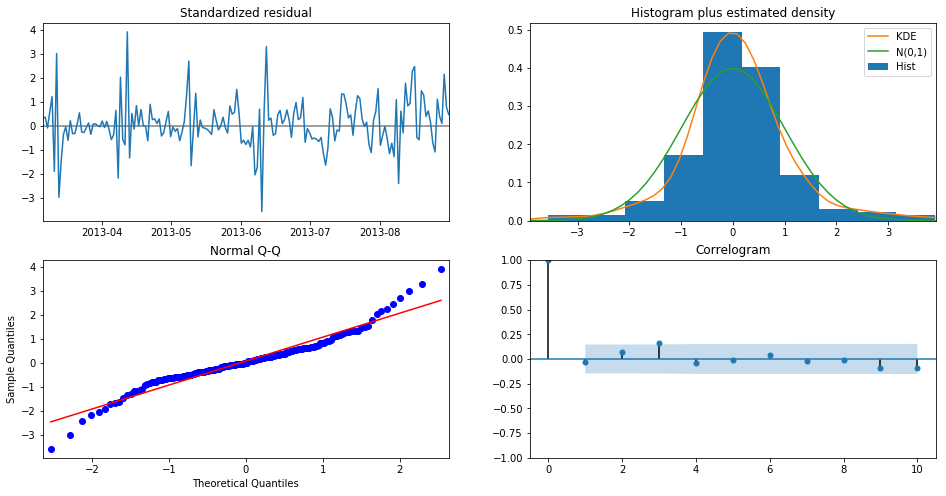

In [32]:
results1.plot_diagnostics(figsize=(16, 8))
plt.show()

In [33]:
mod2 = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(2, 2, 2, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
print(results2.summary().tables[1])  #from manual ARIMA(0, 1, 2)x(2, 2, 2, 30)

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8121      0.118     -6.879      0.000      -1.043      -0.581
ma.L2         -0.2336      0.094     -2.474      0.013      -0.419      -0.049
ar.S.L30      -0.6282      0.271     -2.316      0.021      -1.160      -0.096
ar.S.L60       0.0835      0.131      0.637      0.524      -0.173       0.341
ma.S.L30      -0.6441      0.381     -1.691      0.091      -1.391       0.103
ma.S.L60      -0.3968      0.235     -1.687      0.092      -0.858       0.064
sigma2       7.22e+05   2.76e-07   2.62e+12      0.000    7.22e+05    7.22e+05


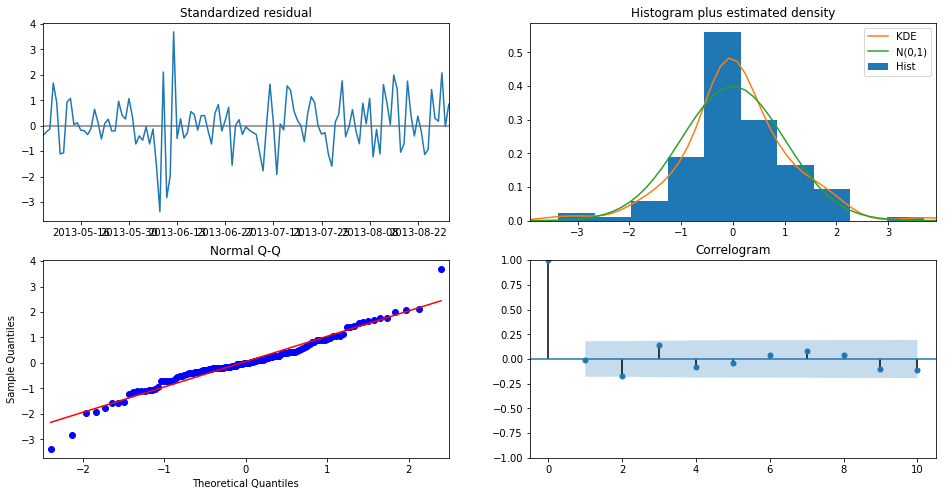

In [34]:
results2.plot_diagnostics(figsize=(16, 8))
plt.show()

In [45]:
train.head()

Datetime_trunc
2013-01-01    402
2013-01-02    464
2013-01-03    748
2013-01-04    602
2013-01-05    948
Name: Count, dtype: int64

In [44]:
test.head()

Datetime_trunc
2013-09-01    238
2013-09-02    438
2013-09-03    400
2013-09-04    874
2013-09-05    886
Name: Count, dtype: int64

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:937: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


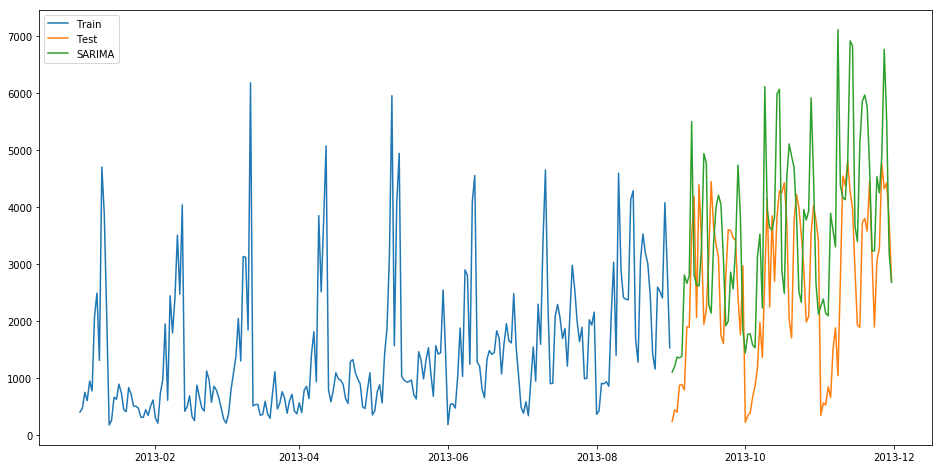

In [62]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order=(0, 1, 2),seasonal_order=(2,2,2,30),\
                                enforce_stationarity=False,\
                                 enforce_invertibility=False).fit()
y_hat_avg = fit1.predict(start="2013-09-01", end="2013-11-30", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg, label='SARIMA')
plt.legend(loc='best')
plt.show()
#2013-09-01':'2013-11-30  (0, 1, 2)x(2, 2, 2, 30)

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


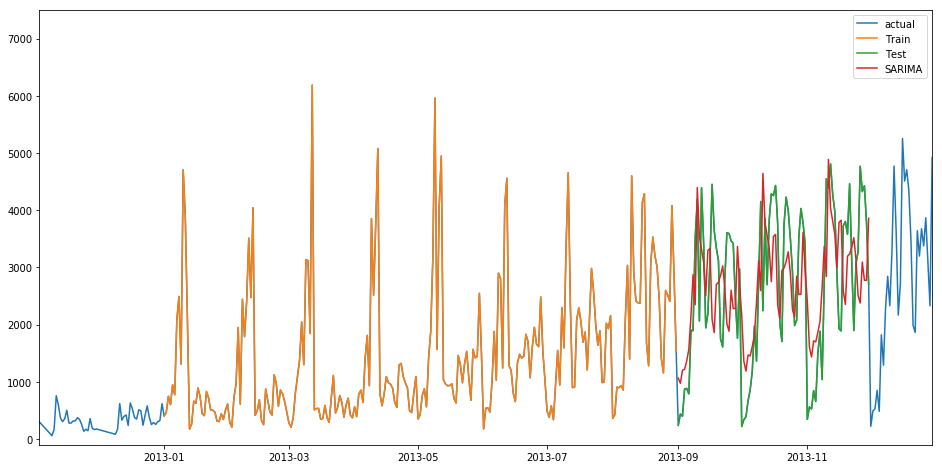

In [81]:
#ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 30); AIC=3494.369, BIC=3514.508, Fit time=9.063 seconds
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 2),seasonal_order=(0,1,1,31),\
                                enforce_stationarity=True,\
                                 enforce_invertibility=True).fit()
y_hat_avg = fit1.predict(start="2013-09-01", end="2013-11-30", dynamic=False)
plt.figure(figsize=(16,8))
plt.plot(df.Count, label='actual')
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg, label='SARIMA')
plt.legend(loc='best')
plt.xlim(['2012-11-03', '2013-12-30'])
plt.ylim([-100,7500])
plt.show()
#2013-09-01':'2013-11-30  (0, 1, 2)x(2, 2, 2, 30)

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


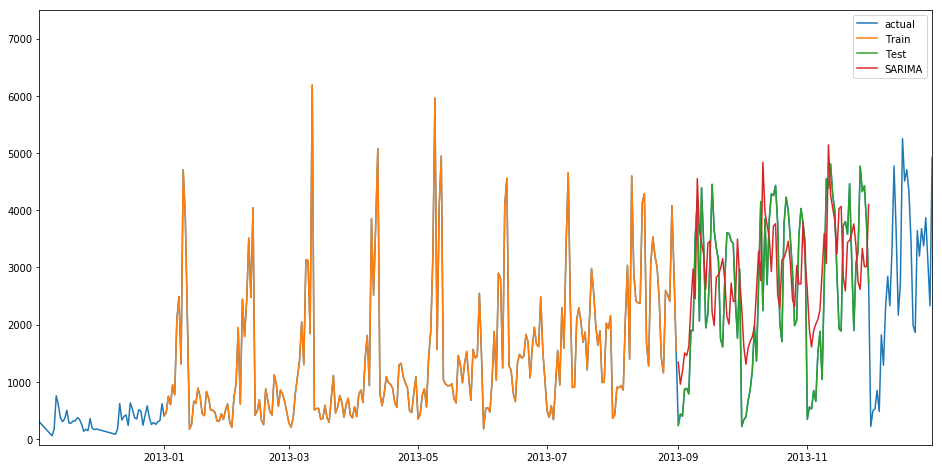

In [85]:
#order=(2, 1, 4),seasonal_order=(0,1,1,7) # from Vidha analytic , seasonal look incorrect
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order=(2, 1, 4),seasonal_order=(0,1,1,31)).fit()
y_hat_avg = fit1.predict(start="2013-09-01", end="2013-11-30", dynamic=False)
plt.figure(figsize=(16,8))
plt.plot(df.Count, label='actual')
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg, label='SARIMA')
plt.legend(loc='best')
plt.xlim(['2012-11-03', '2013-12-30'])
plt.ylim([-100,7500])
plt.show()
#2013-09-01':'2013-11-30  (0, 1, 2)x(2, 2, 2, 30)

## If average of the day is used, seasonal effect will be weekly instead of monthly
## getting sum of daily riders, make to pattern more weekly

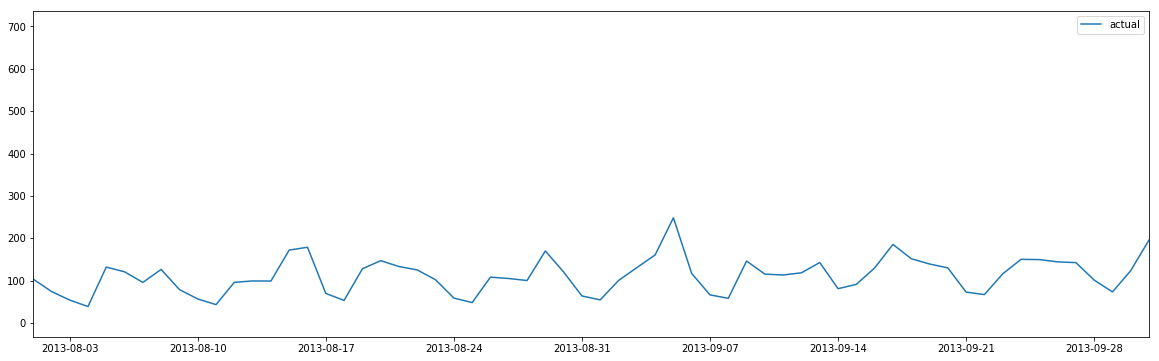

In [122]:
plt.figure(figsize=(20,6))
plt.plot(df_new.index, df_new['Count'], label='actual')
plt.xlim(['2013-08-01', '2013-10-01'])
plt.legend()

<Figure size 1440x720 with 0 Axes>

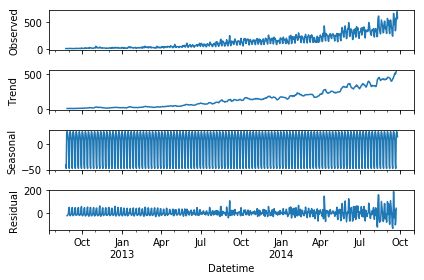

In [118]:
plt.figure(figsize=(20,10))
decomposition = sm.tsa.seasonal_decompose(df_new["Count"], model='additive', freq=7)
fig = decomposition.plot()
plt.show()

In [109]:
train_new = df_new.loc['2013-01-01':'2013-08-31']['Count']
test_new = df_new.loc['2013-09-01':'2013-11-30']['Count']

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


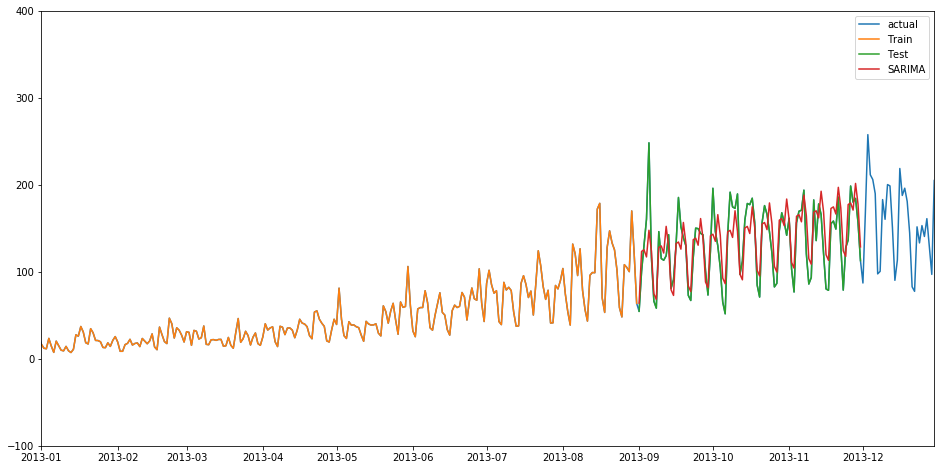

In [134]:
#order=(2, 1, 4),seasonal_order=(0,1,1,7) # from Vidha analytic , seasonal look incorrect
y_hat_avg = test_new.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_new, order=(0, 1, 2),seasonal_order=(0,1,1,7)).fit()
y_hat_avg = fit1.predict(start="2013-09-01", end="2013-11-30", dynamic=False)
plt.figure(figsize=(16,8))
plt.plot(df_new.Count, label='actual')
plt.plot( train_new, label='Train')
plt.plot(test_new, label='Test')
plt.plot(y_hat_avg, label='SARIMA')
plt.legend(loc='best')
plt.xlim(['2013-01-01', '2013-12-30'])
plt.ylim([-100,400])
plt.show()
#2013-09-01':'2013-11-30  (0, 1, 2)x(2, 2, 2, 30)

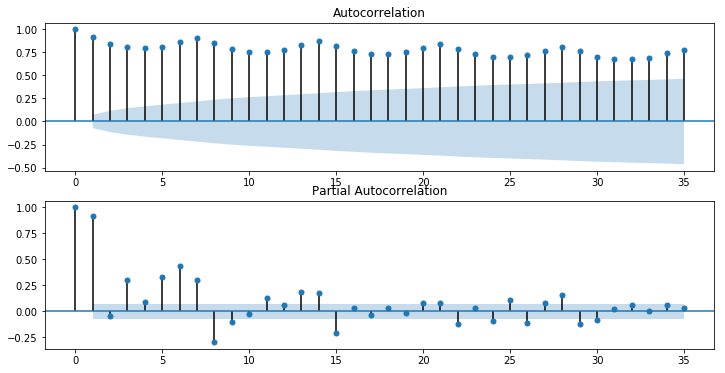

In [123]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df_new["Count"].dropna(), ax=ax[0], lags=35)
ax[1] = plot_pacf(df_new["Count"].dropna(), ax=ax[1], lags=35)

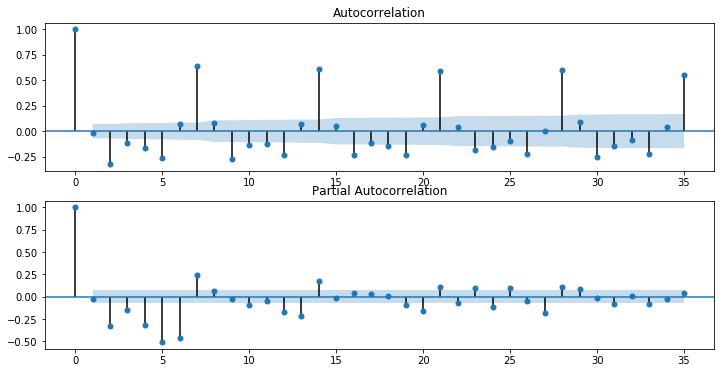

In [124]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df_new["Count"].diff(1).dropna(), ax=ax[0], lags=35)
ax[1] = plot_pacf(df_new["Count"].diff(1).dropna(), ax=ax[1], lags=35)

In [125]:
!pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_new, start_p=0, start_q=0,
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=1963.497, BIC=1973.876, Fit time=0.112 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=2052.686, BIC=2059.605, Fit time=0.024 seconds


smart-open 1.6.0 requires bz2file, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1986.577, BIC=2000.415, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1936.166, BIC=1950.005, Fit time=0.224 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1936.669, BIC=1953.967, Fit time=0.324 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=2034.853, BIC=2045.232, Fit time=0.103 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=1937.580, BIC=1954.878, Fit time=1.036 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1936.730, BIC=1957.487, Fit time=1.162 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1885.143, BIC=1902.441, Fit time=0.556 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=1887.622, BIC=1911.839, Fit time=0.965 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 

In [127]:
#Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=1885.143, BIC=1902.441, Fit time=0.556 seconds
mod_new = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_new = mod_new.fit()
print(results_new.summary().tables[1]) 

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5670      0.078     -7.273      0.000      -0.720      -0.414
ma.L2         -0.4574      0.040    -11.550      0.000      -0.535      -0.380
ma.S.L7       -1.0344      0.099    -10.413      0.000      -1.229      -0.840
sigma2      8.757e+05   1.31e+05      6.684      0.000    6.19e+05    1.13e+06


C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


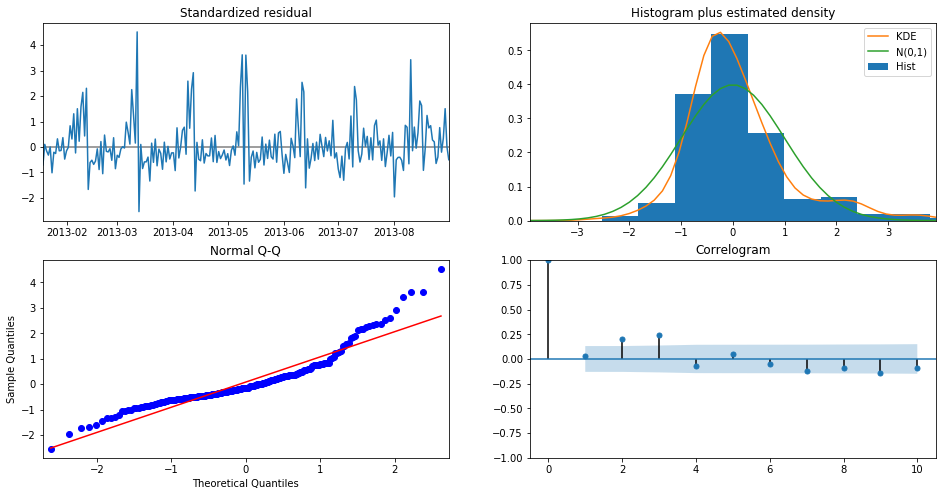

In [128]:
results_new.plot_diagnostics(figsize=(16, 8))
plt.show()  # there is still monthly seasonality is here in the error not that good 

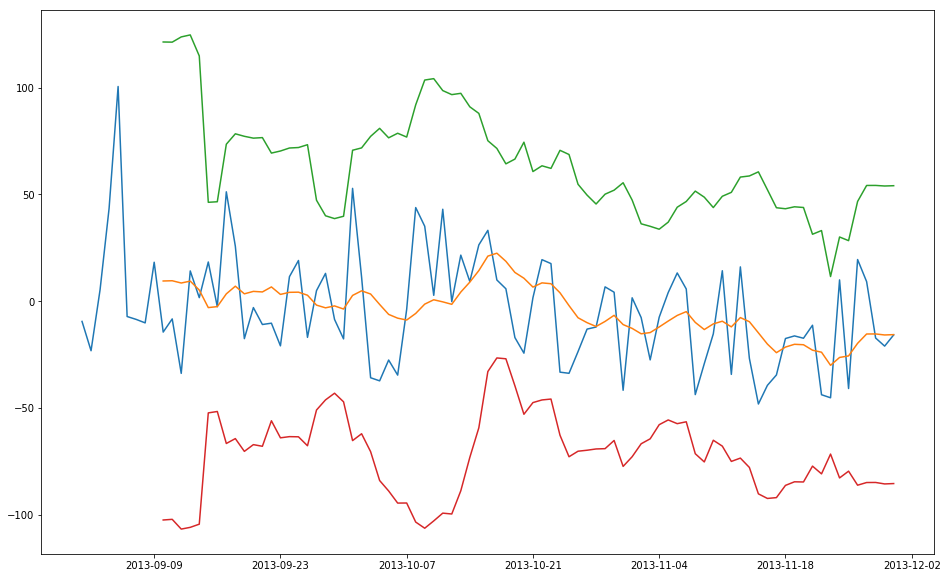

In [145]:
error = test_new - y_hat_avg
plt.figure(figsize=(16,10))
plt.plot(test_new.index, error)
plt.plot(test_new.index, error.rolling(10).mean())
plt.plot(test_new.index, error.rolling(10).mean() + 3.0*error.rolling(10).std())
plt.plot(test_new.index, error.rolling(10).mean() - 3.0*error.rolling(10).std())

In [187]:
df_ml = df_new.reset_index().copy()

In [188]:
df_ml['Datetime'].dt.month.min()

1

In [189]:
df_ml['day'] = df_ml['Datetime'].dt.day
df_ml['dayweek'] = df_ml['Datetime'].dt.dayofweek
df_ml['month'] = df_ml['Datetime'].dt.month
df_ml['year'] = df_ml['Datetime'].dt.year
df_ml['season'] = df_ml['month'].apply(lambda x: (x%12 + 3)//3)

In [190]:
df_ml.head()

,Datetime,ID,Count,day,dayweek,month,year,season
0,2012-08-25,11.5,3.166667,25,5,8,2012,3
1,2012-08-26,35.5,3.666667,26,6,8,2012,3
2,2012-08-27,59.5,2.583333,27,0,8,2012,3
3,2012-08-28,83.5,2.416667,28,1,8,2012,3
4,2012-08-29,107.5,2.500000,29,2,8,2012,3


In [191]:
df_ml['dayweek'] = df_ml['dayweek'].astype('category')
df_ml['month'] = df_ml['month'].astype('category')
df_ml['year'] = df_ml['year'].astype('category')
df_ml['season'] = df_ml['season'].astype('category')
df_ml['day'] = df_ml['day'].astype('category')
df_dummy = pd.get_dummies(df_ml)

In [192]:
df_dummy.head()

,Datetime,ID,Count,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,month_10,month_11,month_12,year_2012,year_2013,year_2014,season_1,season_2,season_3,season_4
0,2012-08-25,11.5,3.166667,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012-08-26,35.5,3.666667,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2012-08-27,59.5,2.583333,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,2012-08-28,83.5,2.416667,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2012-08-29,107.5,2.500000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_dummy_scaler = scaler.fit_transform(df_dummy[['Count']])

In [201]:
df_dummy_scaler = pd.DataFrame(df_dummy_scaler, index = df_new.index, columns=['scaled_count'])

In [205]:
df_dummy_scaler_date = pd.merge(df_dummy_scaler, df_dummy.drop(['ID', 'Count'], axis=1), how='inner', on='Datetime')

In [206]:
df_dummy_scaler_date.columns

Index(['Datetime', 'scaled_count', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'dayweek_0',
       'dayweek_1', 'dayweek_2', 'dayweek_3', 'dayweek_4', 'dayweek_5',
       'dayweek_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'year_2012', 'year_2013', 'year_2014', 'season_1',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

In [207]:
df_dummy_scaler_date.drop(columns=['Datetime'], axis=1, inplace=True)

In [209]:
df_dummy_scaler_date.head()

,scaled_count,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,...,month_10,month_11,month_12,year_2012,year_2013,year_2014,season_1,season_2,season_3,season_4
0,-0.999773,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.996092,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.004068,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-1.005295,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-1.004682,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [210]:
df_dummy_scaler_date.shape[0]

762

In [217]:
from sklearn.cluster import KMeans

models = [KMeans(k).fit(df_dummy_scaler) for k in range(1,40)]

In [218]:
scores = [models[i].score(df_dummy_scaler) for i in range(len(models))]

(0, 15)

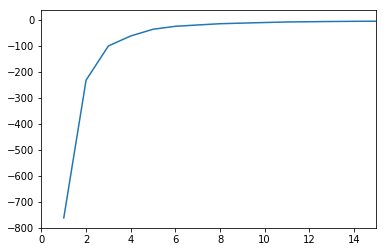

In [221]:
plt.plot(range(1,40), scores)
plt.xlim([0,15])

In [222]:
model_k_7 = KMeans(7).fit(df_dummy_scaler)

In [238]:
model_k_7.cluster_centers_

array([[-0.85565733],
       [ 0.80541991],
       [ 0.24263304],
       [ 3.19522858],
       [-0.30114629],
       [ 2.17024917],
       [ 1.52900002]])

In [239]:
labels = model_k_7.labels_
centers = model_k_7.cluster_centers_
distance = []
for i, point in enumerate(df_dummy_scaler.scaled_count.values):
    distance.append(np.abs(centers[labels[i]][0] - point))    

In [263]:
total_point = len(distance)
percent = 0.05

In [258]:
thershold = min(sorted(distance, reverse=True)[:int(total_point*percent)])

In [259]:
distance_df = pd.DataFrame(distance, df_dummy_scaler.index, columns=['distance'])

In [260]:
distance_df['Count'] = df_new['Count']

In [261]:
def anomaly(x, thershold):
    if(x >= thershold):
        return 1
    else:
        return 0
    
    
distance_df['anamoly_tag'] = distance_df['distance'].apply(lambda x:anomaly(x, thershold))

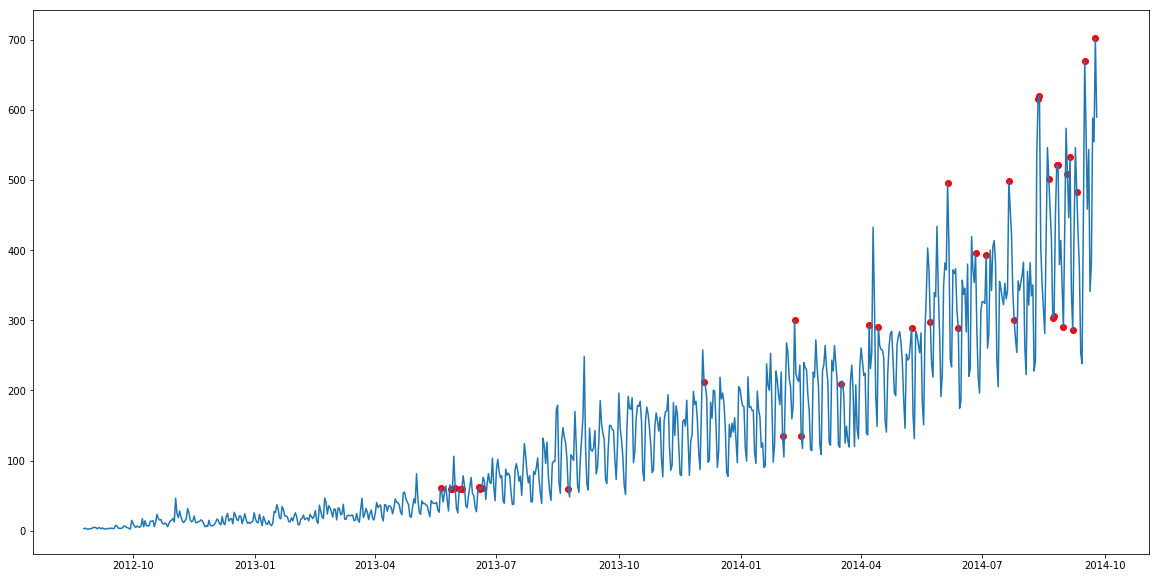

In [262]:
a = distance_df[distance_df['anamoly_tag'] == 1]
plt.figure(figsize=(20,10))
plt.plot(distance_df.index, distance_df['Count'])
plt.scatter(a.index, a['Count'], color='red')  # should remove moving average from this, need to have more features, is not stationary

# Isolation Forest

In [264]:
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [265]:
model =  IsolationForest(contamination=0.01)

In [267]:
df_dummy_scaler.head()

,scaled_count
Datetime,
2012-08-25,-0.999773
2012-08-26,-0.996092
2012-08-27,-1.004068
2012-08-28,-1.005295
2012-08-29,-1.004682
